In [1]:
!pip install --upgrade -q networkx

In [2]:
!pip install -q pydot

# Graph Analytics

## Representing Graphs

$graph = \{(u, v, w), \dots \}$


In [13]:
from random import randint 

In [14]:
rw = lambda : {'likes': randint(0, 5) }

In [15]:
people = range(4)

edges = [
    (u, v, rw()) for u in people for v in people if u != v
] 

In [16]:
edges

[(0, 1, {'likes': 2}),
 (0, 2, {'likes': 0}),
 (0, 3, {'likes': 5}),
 (1, 0, {'likes': 4}),
 (1, 2, {'likes': 1}),
 (1, 3, {'likes': 2}),
 (2, 0, {'likes': 5}),
 (2, 1, {'likes': 0}),
 (2, 3, {'likes': 0}),
 (3, 0, {'likes': 4}),
 (3, 1, {'likes': 1}),
 (3, 2, {'likes': 3})]

In [17]:
names = ['alice', 'eve', 'bob', 'dan']
print(*[ names[u_id] + "->" + names[v_id] for (u_id, v_id, _) in edges], sep='\n')

alice->eve
alice->bob
alice->dan
eve->alice
eve->bob
eve->dan
bob->alice
bob->eve
bob->dan
dan->alice
dan->eve
dan->bob


In [18]:
import networkx as nx

In [19]:
G = nx.from_edgelist(edges, nx.DiGraph)

In [20]:
type(G)

networkx.classes.digraph.DiGraph

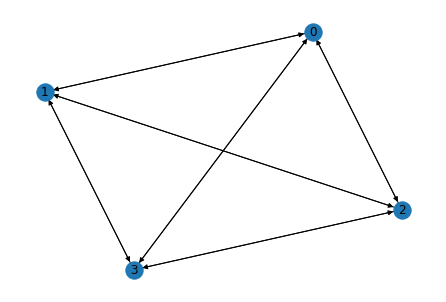

In [21]:
nx.draw(G, with_labels=True);

/Users/mjburgess/anaconda3/lib/python3.7/site-packages/networkx/drawing/layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


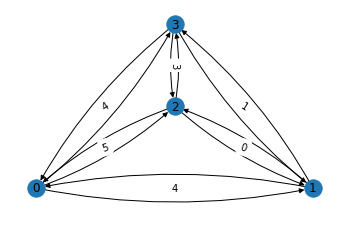

In [22]:
pos = nx.planar_layout(G)

nx.draw_networkx_edge_labels(Gb, pos, edge_labels={(u,v): w['likes'] for (u, v, w) in edges})

nx.draw(G,pos, with_labels=True, connectionstyle='arc3, rad = 0.1')

In [25]:
list(nx.dfs_edges(G))

[(0, 1), (1, 2), (2, 3)]

In [27]:
list(nx.bfs_edges(G, source=0))

[(0, 1), (0, 2), (0, 3)]

In [43]:
list(G.edges())

[(0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 2)]

In [44]:
list(G.edges(data=True))

[(0, 1, {'likes': 2}),
 (0, 2, {'likes': 3}),
 (0, 3, {'likes': 3}),
 (1, 0, {'likes': 0}),
 (1, 2, {'likes': 1}),
 (1, 3, {'likes': 3}),
 (2, 0, {'likes': 4}),
 (2, 1, {'likes': 0}),
 (2, 3, {'likes': 1}),
 (3, 0, {'likes': 2}),
 (3, 1, {'likes': 2}),
 (3, 2, {'likes': 0})]

In [45]:
list(G.nodes())

[0, 1, 2, 3]

In [48]:
list(G.nodes(data=True))

[(0, {}), (1, {}), (2, {}), (3, {})]

In [62]:
G.nodes[0]['team'] = 'blue'

In [63]:
list(G.nodes(data=True))

[(0, {'team': 'blue'}), (1, {}), (2, {}), (3, {})]

In [72]:
G.update(nodes=[(n, {'team': 'blue' if n > 1 else 'red'}) for n in G.nodes()])

In [73]:
list(G.nodes(data=True))

[(0, {'team': 'red'}),
 (1, {'team': 'red'}),
 (2, {'team': 'blue'}),
 (3, {'team': 'blue'})]

In [74]:
[d['team'] for n, d in G.nodes(True)]

['red', 'red', 'blue', 'blue']

In [75]:
from collections import Counter

Counter([d['team'] for n, d in G.nodes(True)])

Counter({'red': 2, 'blue': 2})

## Graph Features

* Paths
    * Travelling Salesman
* Trees
    * 
* Cliques
* Hubs

* Bipartite Graphs

## Graph Metrics

In [158]:
list(G.neighbors(0))

[1, 3]

## Graph Algorithms

In [3]:
import networkx as nx

In [8]:
G = nx.path_graph(5)
list(nx.dfs_edges(G, source=0))

[(0, 1), (1, 2), (2, 3), (3, 4)]

In [10]:
list(nx.dfs_edges(G, source=0, depth_limit=2))

[(0, 1), (1, 2)]

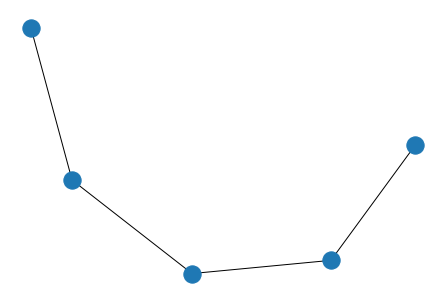

In [7]:
nx.draw(G);

* Depth-First Search
* Bredth-First Search
* Prim's Algorithm

In [90]:
import numpy as np

g = np.array([ 
    [0, 2, 0, 6, 0], 
    [2, 0, 3, 8, 5], 
    [0, 3, 0, 0, 7], 
    [6, 8, 0, 0, 9], 
    [0, 5, 7, 9, 0]
])


AG = nx.from_numpy_matrix(g)

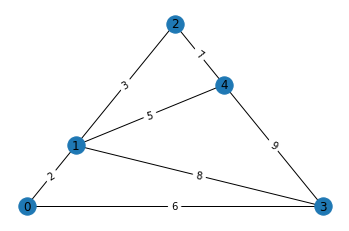

In [96]:
pos = nx.planar_layout(AG)
nx.draw_networkx_edge_labels(AG, pos, edge_labels={(u,v): w['weight'] for (u, v, w) in AG.edges(data=True)})
nx.draw(AG,pos, with_labels=True, connectionstyle='arc3, rad = 0.1')

In [99]:
g

array([[0, 2, 0, 6, 0],
       [2, 0, 3, 8, 5],
       [0, 3, 0, 0, 7],
       [6, 8, 0, 0, 9],
       [0, 5, 7, 9, 0]])

In [102]:
g[0][1]

2

In [126]:
def minimum_node(pick_weights, exclude=[]): 
    min_value = float('inf')
    for node_index in range(len(pick_weights)): 
        if pick_weights[node_index] < min_value and node_index not in exclude: 
            min_value = pick_weights[node_index] 
            min_index = node_index

    return min_index 

In [127]:
minimum_node([0, 5, 10, 30],[0, 1])

2

In [128]:
g[0]

array([0, 2, 0, 6, 0])

In [129]:
minimum_node(g[0], [0, 2])

4

In [154]:
path = [ None, None, None, None, None]

picked = [0]
included = [0, 100, 100, 100, 100]
min_node = minimum_node(considered, picked)

picked.append(min_node)

for v in range(len(g)):
    minv_weight = g[min_node][v]
    
    if minv_weight > 0 and v not in picked and included[v] > minv_weight:
        included[v] = minv_weight
        path[v] = min_node

In [155]:
path

[None, None, 1, 1, 1]

In [151]:
def mst_prim(graph): 
    N = len(graph)
    
    mst = [None] * N     # empty tree
    picked = [float('inf')] * N # unpickable weights
    
    picked[0] = 0 # start with node 0
    mst[0] = -1 # start with node 0        

    included = []

    for _ in range(N): 
        u = minimum_node(picked, included)
        included.append(u)
        
        for v in range(N):      
            if graph[u][v] > 0 and v not in included and picked[v] > graph[u][v]: 
                picked[v] = graph[u][v] 
                mst[v] = u # choose u for v
                
    
    # create edge list and remove dummy path (from starting at -1)
    return list(enumerate(mst))[1:] 

In [152]:
import pandas as pd 


mst =  mst_prim(g)

pd.DataFrame({
    'edge':   [ f"{u} <-> {v}" for u, v in mst ],
    'weight': [ g[u][v] for u, v in mst ]
})

,edge,weight
0,1 <-> 0,2
1,2 <-> 1,3
2,3 <-> 0,6
3,4 <-> 1,5


In [78]:
sum([ g[u][v] for u, v in mst ])

16

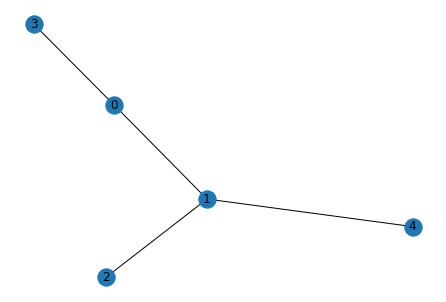

In [80]:
nx.draw(nx.from_edgelist(mst), with_labels=True)